In [4]:
from pathlib import Path
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Configure notebook and get raw data

In [5]:
data_path = Path("../../data/MACH_data/data.cleaned.csv")
codebook_path = Path("../../data/MACH_data/codebook.txt")
original_data_df = pd.read_csv(data_path)

# Choose features
Sticking to just the actual question response for now.

In [6]:
question_responses = ["Q1A", "Q2A", "Q3A", "Q4A", "Q5A", "Q6A", "Q7A", "Q8A", "Q9A", "Q10A", 
                      "Q11A", "Q12A", "Q13A", "Q14A", "Q15A", "Q16A", "Q17A", "Q18A", "Q19A", "Q20A"]
X = original_data_df[question_responses].copy()
print(f"Using features: {question_responses}  |  Shape: {X.shape}")
display(X.head())

Using features: ['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A', 'Q20A']  |  Shape: (73489, 20)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
0,3.0,3.0,5.0,2.0,3.0,1.0,2.0,4.0,3.0,3.0,1.0,5.0,4.0,1.0,5.0,2.0,4.0,4.0,4.0,4.0
1,5.0,5.0,1.0,3.0,5.0,1.0,1.0,4.0,2.0,1.0,1.0,5.0,5.0,2.0,5.0,1.0,2.0,4.0,5.0,3.0
2,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,1.0,5.0,5.0,3.0
3,2.0,4.0,2.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,1.0,5.0,1.0,1.0,4.0,1.0,1.0,5.0,3.0,4.0
4,5.0,5.0,2.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,1.0,4.0,5.0,1.0


# Data preprocessing
Scaling this data is likely not necessary since the data is usually between 1 and 5, with some NA values.

In [7]:
X_clean = X.dropna().copy()
X_clean[question_responses] = X_clean[question_responses].astype(int)
Xs = pd.DataFrame(X_clean, columns=question_responses, index=X_clean.index)
# use only 5000 random datapoints
Xs_sample = Xs.sample(n=5000, random_state=42)
print(f"After preprocessing shape: {Xs_sample.shape}")
display(Xs_sample.head())
display(Xs_sample.describe().T.round(3))

After preprocessing shape: (5000, 20)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
5860,2,1,3,4,4,3,2,2,3,3,3,4,5,3,5,3,1,5,4,4
61638,4,1,1,1,1,1,1,1,5,4,1,5,1,4,5,1,5,1,5,2
33684,5,5,2,3,5,2,2,2,1,4,1,5,4,2,3,2,2,5,5,5
32572,2,4,3,4,2,3,4,2,3,5,1,5,2,1,2,2,1,4,5,4
2493,2,4,4,2,3,3,3,4,5,4,2,2,1,2,3,3,2,4,3,4


,count,mean,std,min,25%,50%,75%,max
Q1A,5000.0,3.318,1.516,1.0,2.0,4.0,5.0,5.0
Q2A,5000.0,3.312,1.473,1.0,2.0,4.0,5.0,5.0
Q3A,5000.0,2.800,1.432,1.0,2.0,3.0,4.0,5.0
Q4A,5000.0,2.766,1.416,1.0,1.0,3.0,4.0,5.0
Q5A,5000.0,3.626,1.346,1.0,3.0,4.0,5.0,5.0
Q6A,5000.0,2.597,1.482,1.0,1.0,2.0,4.0,5.0
Q7A,5000.0,2.148,1.358,1.0,1.0,2.0,3.0,5.0
Q8A,5000.0,3.130,1.481,1.0,2.0,4.0,4.0,5.0
Q9A,5000.0,3.769,1.404,1.0,3.0,4.0,5.0,5.0
Q10A,5000.0,3.135,1.501,1.0,2.0,3.0,5.0,5.0


# Elbow method to decide k

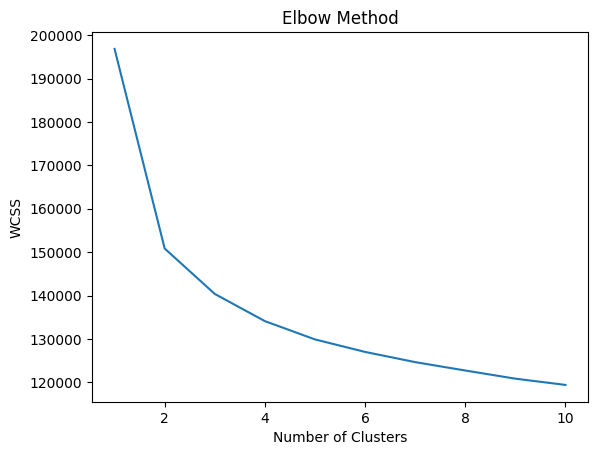

[196815.94039999996, 150828.0475466381, 140364.746395423, 134101.18991261718, 129884.4597529028, 127005.88552108435, 124653.03682242814, 122721.5294699103, 120841.51998918515, 119401.12369967916]


In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(Xs_sample)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
print(wcss)

It seems that k = 2 to 6 is the elbow point.

# Cluster

In [9]:
k_range = range(2, 7)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(Xs_sample)

    # get silhoutte score
    sil = silhouette_score(Xs_sample, clusters)
    print(f"Silhouette Score for k={k}: {sil}")

Silhouette Score for k=2: 0.20703409339322854
Silhouette Score for k=3: 0.12406769562727747
Silhouette Score for k=4: 0.12695184040719432
Silhouette Score for k=5: 0.0829715013015925
Silhouette Score for k=6: 0.08072961120515779


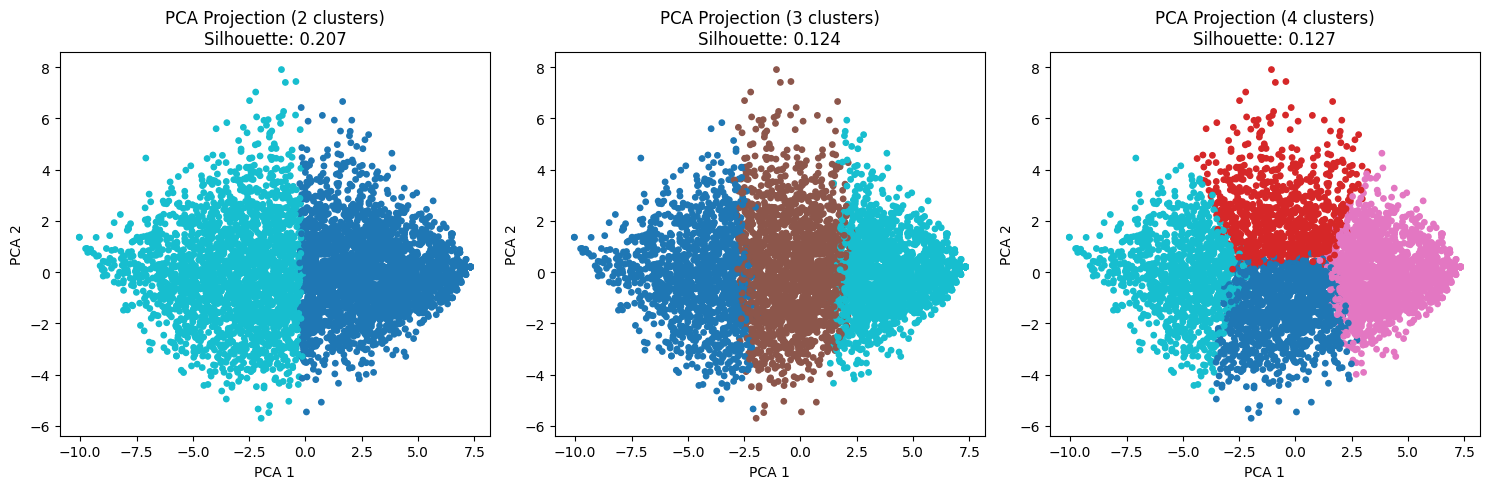

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xs_sample)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, k in enumerate([2, 3, 4]):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(Xs_sample)
    score = silhouette_score(Xs_sample, labels)
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", s=15)
    axes[i].set_title(f"PCA Projection ({k} clusters)\nSilhouette: {score:.3f}")
    axes[i].set_xlabel("PCA 1")
    axes[i].set_ylabel("PCA 2")
plt.tight_layout()
plt.show()

# Analyze cluster mean responses

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
Cluster,,,,,,,,,,,,,,,,,,,,
0,4.192063,4.081617,2.216024,2.128416,4.236615,1.778735,1.530139,3.774616,2.990266,2.368401,1.377761,4.385998,3.696743,1.647697,4.044553,1.962186,2.032198,4.182329,4.576189,2.963310
1,2.315586,2.430228,3.469729,3.498068,2.925719,3.535852,2.856591,2.391155,4.662087,4.013310,2.134392,2.911550,2.032632,2.616574,2.762559,3.159296,2.698154,2.885359,4.040361,1.804208


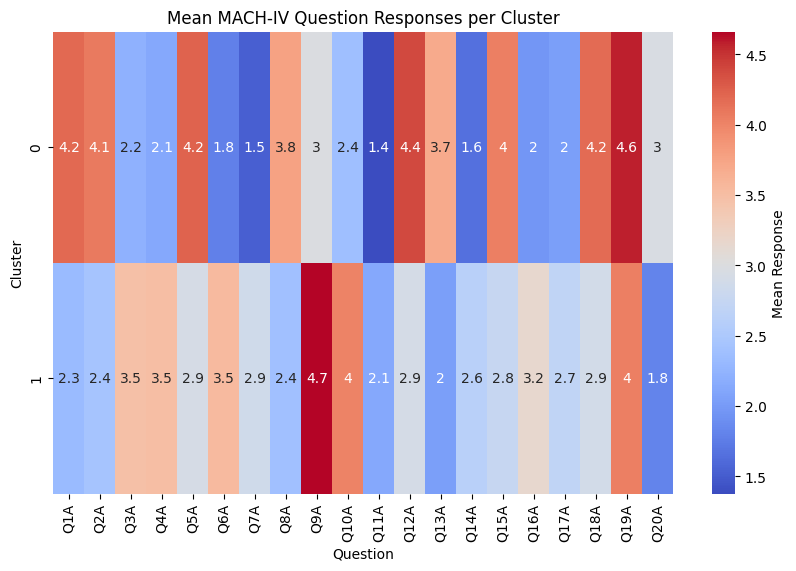

In [11]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
labels = kmeans.fit_predict(Xs_sample)
df = Xs_sample.copy()
df["Cluster"] = labels

cluster_means = df.groupby("Cluster").mean()
display(cluster_means)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", cbar_kws={"label": "Mean Response"})
plt.title("Mean MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
Cluster,,,,,,,,,,,,,,,,,,,,
0,5,5,1,1,5,1,1,5,3,1,1,5,5,1,5,1,1,5,5,1
1,1,1,4,4,4,4,2,1,5,5,1,4,1,2,4,5,1,4,5,1


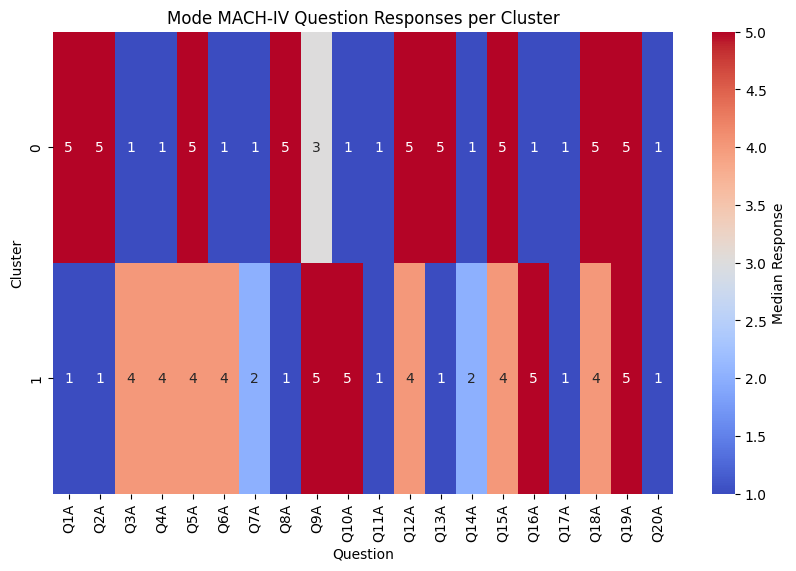

In [12]:
cluster_modes = df.groupby("Cluster")[question_responses] \
                  .agg(lambda x: x.mode().iloc[0]) # first mode
display(cluster_modes)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_modes, annot=True, cmap="coolwarm", cbar_kws={"label": "Median Response"})
plt.title("Mode MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()

# Check for patterns with other columns

In [13]:
other_responses = ["TIPI1","TIPI2","TIPI3","TIPI4","TIPI5","TIPI6","TIPI7","TIPI8","TIPI9","TIPI10",
                   "VCL1","VCL2","VCL3","VCL4","VCL5","VCL6","VCL7","VCL8","VCL9","VCL10", "VCL11","VCL12","VCL13","VCL14","VCL15", "VCL16",
                   "education", "urban", "gender", "engnat", "age", "hand", "religion", "orientation", "race", "voted", "married", "familysize", "major"]

# remove major for now
other_responses.remove("major")

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.553030,0.702412,0.719902,0.554260,0.802054,0.658448,0.622506,0.528427,0.669252,0.372573,...,0.453763,0.71097,0.000014,0.394484,0.351585,0.273531,0.715302,0.784912,0.416199,0.102786
1,0.601239,0.567319,0.753788,0.580752,0.812611,0.641170,0.802490,0.474085,0.679630,0.379194,...,0.524975,0.67003,0.000449,0.384142,0.402569,0.265264,0.728762,0.749893,0.484471,0.110938


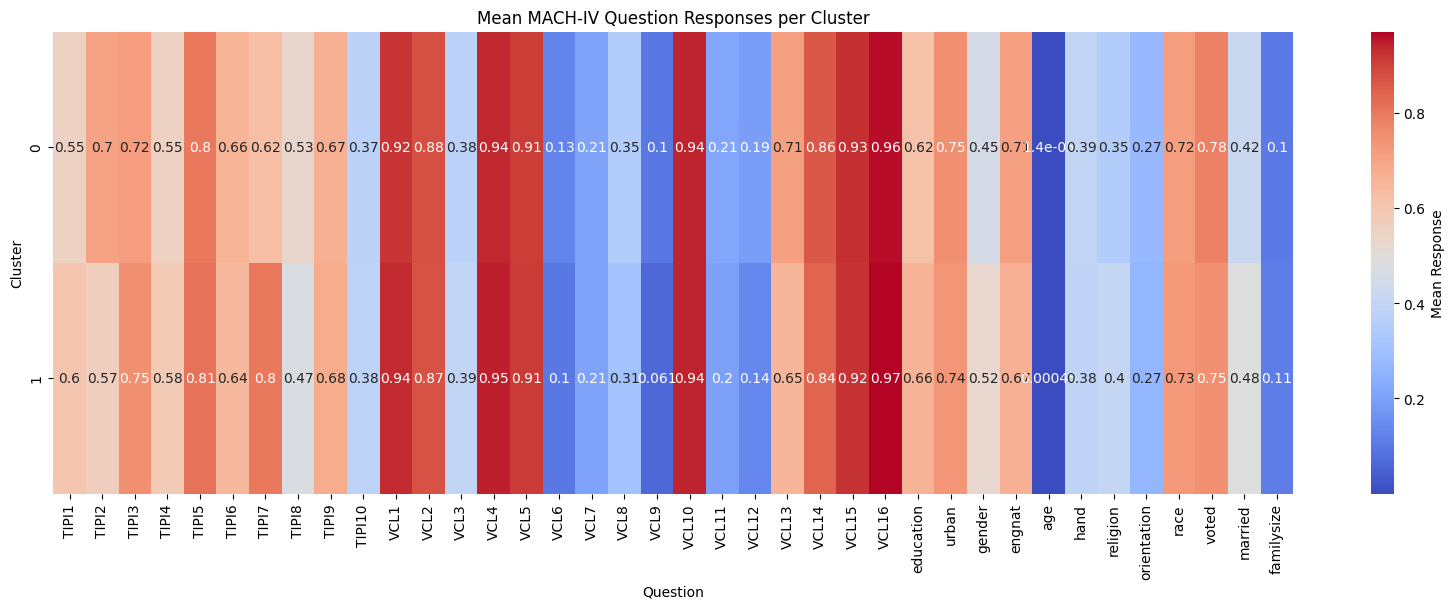

In [14]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
labels = kmeans.fit_predict(Xs_sample)
Xs_sample_with_other_responses = original_data_df.loc[Xs_sample.index]
df = pd.DataFrame(Xs_sample_with_other_responses, columns=other_responses, index=Xs_sample_with_other_responses.index)

scaler = MinMaxScaler()
normalized_df = pd.DataFrame(
    scaler.fit_transform(df),
    columns= df.columns,
    index=df.index
)

normalized_df["Cluster"] = labels

cluster_means = normalized_df.dropna().groupby("Cluster").mean()
display(cluster_means)

plt.figure(figsize=(20, 6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", cbar_kws={"label": "Mean Response"})
plt.title("Mean MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.285714,0.714286,0.857143,0.714286,1.0,1.000000,0.714286,0.714286,0.857143,0.142857,...,0.333333,0.5,0.000005,0.333333,0.166667,0.2,0.857143,1.0,0.333333,0.083333
1,0.857143,0.714286,0.857143,0.714286,1.0,0.714286,1.000000,0.142857,0.857143,0.142857,...,0.666667,0.5,0.000005,0.333333,0.166667,0.2,0.857143,1.0,0.333333,0.083333


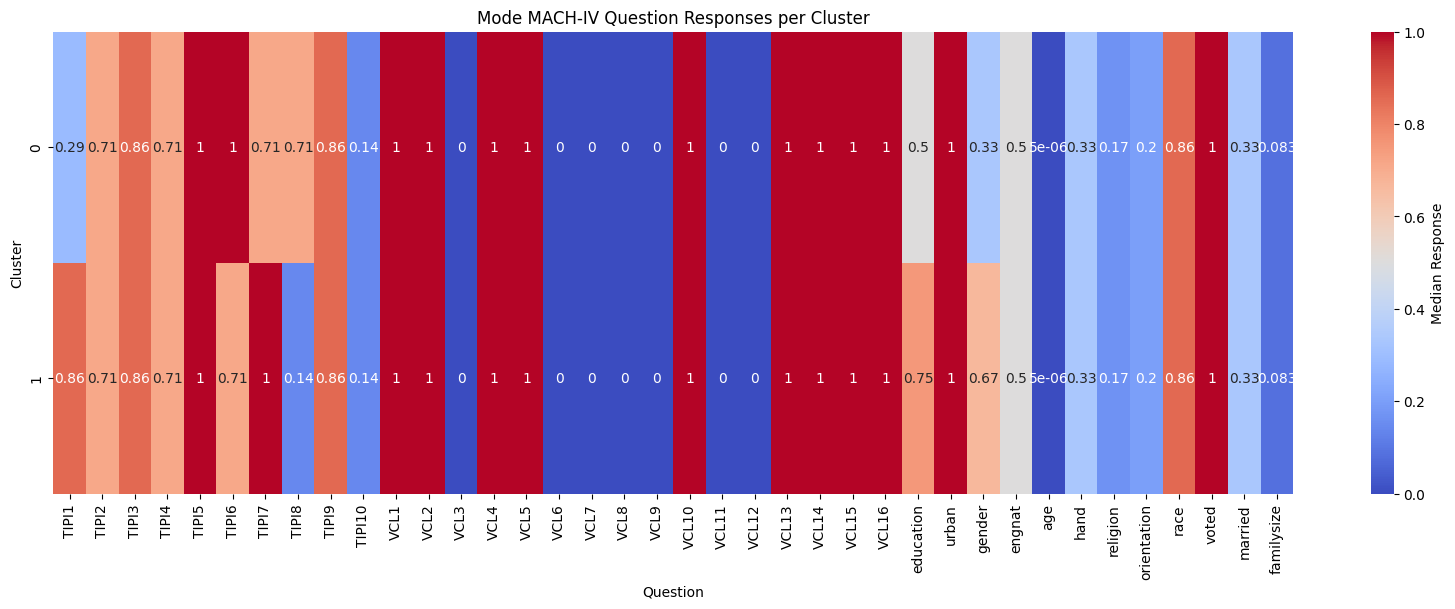

In [15]:
cluster_modes = normalized_df.groupby("Cluster")[other_responses] \
                  .agg(lambda x: x.mode().iloc[0]) # first mode
display(cluster_modes)

plt.figure(figsize=(20, 6))
sns.heatmap(cluster_modes, annot=True, cmap="coolwarm", cbar_kws={"label": "Median Response"})
plt.title("Mode MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()